# Segmenting and Clustering Neighborhoods in Toronto

## Question 1
For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.
2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas  dataframe like the one shown below:
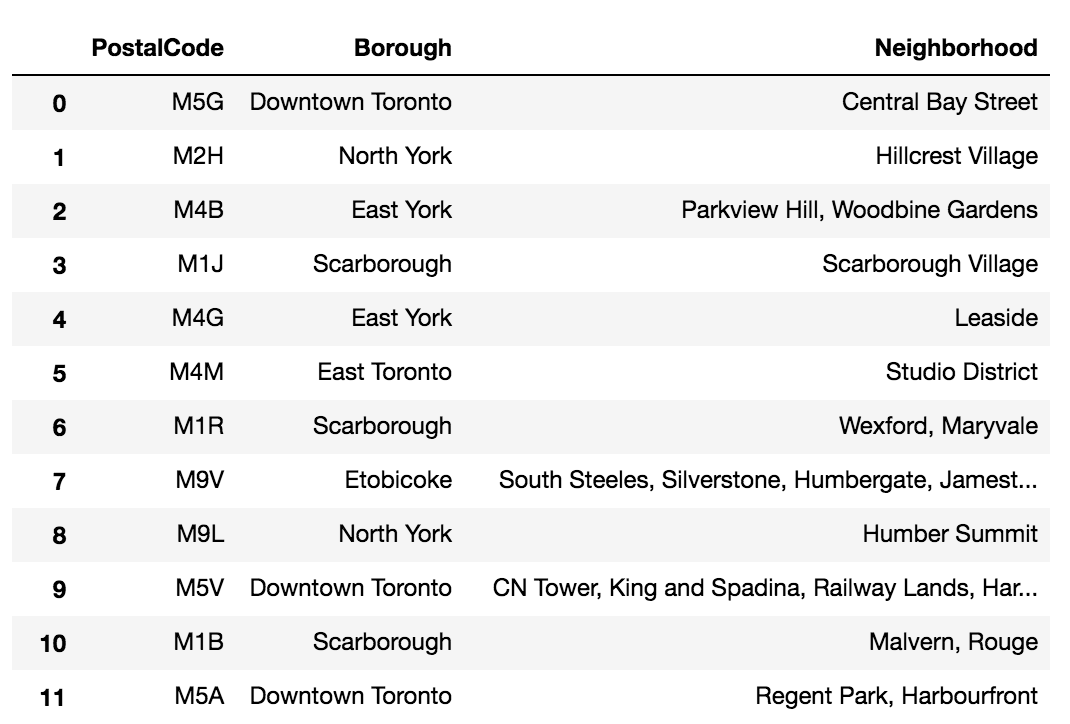

Scrapting table of postal code using package BeautifulSoup

In [8]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup 

req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M") 
soup = BeautifulSoup(req.content,'lxml') 
table = soup.find_all('table')[0]  
df = pd.read_html(str(table)) 

df1=pd.DataFrame(df[0])
df1

Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                         Neighbourhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177                                       Not assigned  
178  Mimico NW, The Queensway West, South of Bloor,...  
179                                       Not assigned  

[180 rows x 3 columns]

3. To create the above dataframe:
- The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
- Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.
- If  a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
- Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [23]:
#Rename column headers
df1 = df1.rename(index=str, columns={'Postal Code':'PostalCode','Neighbourhood':'Neighborhood'})
df1.head()

PostalCode      Borough                            Neighborhood
0        M1B  Scarborough                          Malvern, Rouge
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2        M1E  Scarborough       Guildwood, Morningside, West Hill
3        M1G  Scarborough                                  Woburn
4        M1H  Scarborough                               Cedarbrae

In [24]:
#ignore cells with a borough that is Not assigned
df1 = df1[df1['Borough']!='Not assigned']

In [26]:
#group multiple neighborhoods having same postal code
df1 = df1.groupby(['PostalCode', 'Borough'], as_index=False).agg(lambda x: ", ".join(x))
df1['Neighborhood'] = df1['Neighborhood'].str.replace('/', ',')
df1.head()

PostalCode      Borough                            Neighborhood
0        M1B  Scarborough                          Malvern, Rouge
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2        M1E  Scarborough       Guildwood, Morningside, West Hill
3        M1G  Scarborough                                  Woburn
4        M1H  Scarborough                               Cedarbrae

In [27]:
df1[df1['Neighborhood'] == 'Not assigned']['Neighborhood'] = df1['Borough']
df1.head()

PostalCode      Borough                            Neighborhood
0        M1B  Scarborough                          Malvern, Rouge
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2        M1E  Scarborough       Guildwood, Morningside, West Hill
3        M1G  Scarborough                                  Woburn
4        M1H  Scarborough                               Cedarbrae

In [28]:
df1.shape

(103, 3)

## Question 2
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking  postal code M5G as an example, your code would look something like this:
```
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]
```

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:
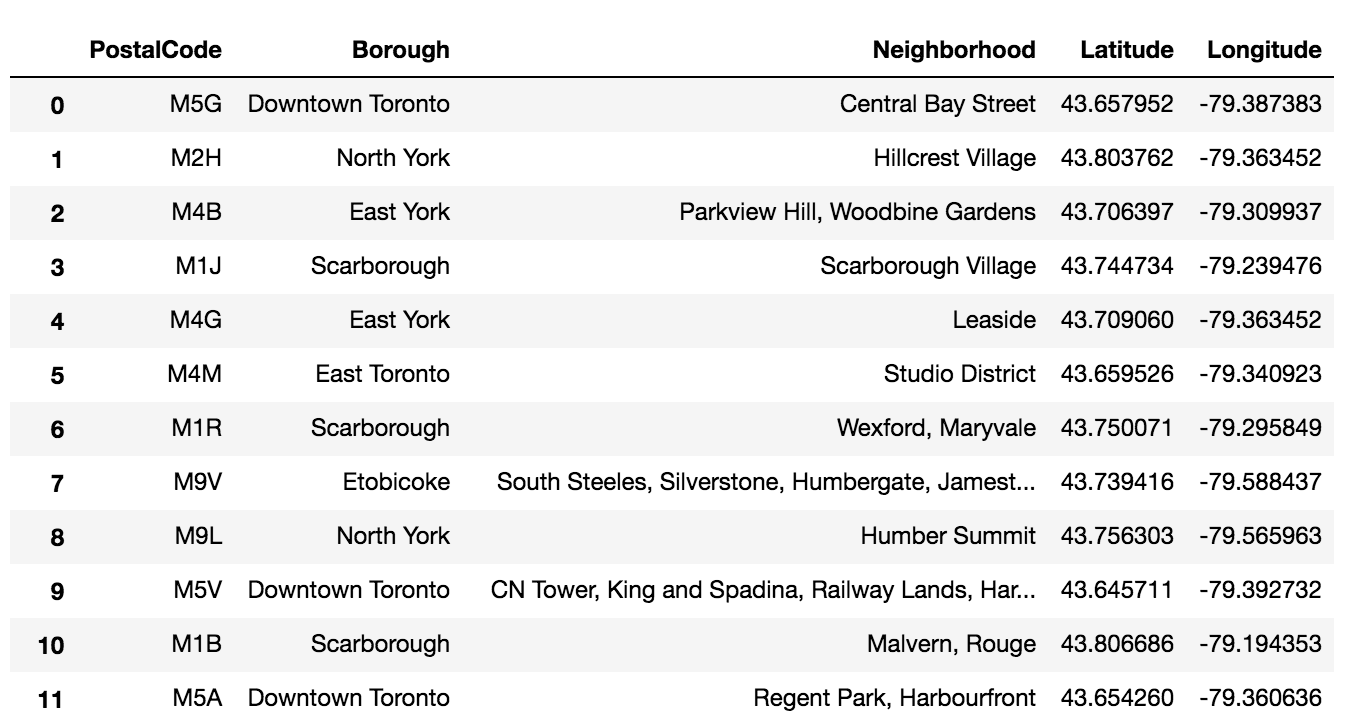

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

In [30]:
!pip install geocoder

In [36]:
df2 = pd.read_csv('http://cocl.us/Geospatial_data')
df2.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [37]:
df2.rename(columns={"Postal Code": "PostalCode"}, inplace=True)
df2.head()

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

In [38]:
df1 = df1.merge(df2, on="PostalCode", how="left")
df1.head()

PostalCode      Borough                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Malvern, Rouge  43.806686   
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [40]:
#Check geocoordinates for consistency.
# create a new test dataframe
column_names = ["PostalCode", "Borough", "Neighborhood", "Latitude", "Longitude"]
test_df = pd.DataFrame(columns=column_names)

test_list = ["M5G", "M2H", "M4B", "M1J", "M4G", "M4M", "M1R", "M9V", "M9L", "M5V", "M1B", "M5A"]

for postcode in test_list:
    test_df = test_df.append(df2[df2["PostalCode"]==postcode], ignore_index=True)
    
test_df

PostalCode Borough Neighborhood   Latitude  Longitude
0         M5G     NaN          NaN  43.657952 -79.387383
1         M2H     NaN          NaN  43.803762 -79.363452
2         M4B     NaN          NaN  43.706397 -79.309937
3         M1J     NaN          NaN  43.744734 -79.239476
4         M4G     NaN          NaN  43.709060 -79.363452
5         M4M     NaN          NaN  43.659526 -79.340923
6         M1R     NaN          NaN  43.750072 -79.295849
7         M9V     NaN          NaN  43.739416 -79.588437
8         M9L     NaN          NaN  43.756303 -79.565963
9         M5V     NaN          NaN  43.628947 -79.394420
10        M1B     NaN          NaN  43.806686 -79.194353
11        M5A     NaN          NaN  43.654260 -79.360636

In [42]:
test_df.shape

(12, 5)

In [48]:
Toronto = df1[df1['Borough'].str.contains('Toronto')].reset_index(drop=True)
Toronto.head()

PostalCode          Borough                    Neighborhood   Latitude  \
0        M4E     East Toronto                     The Beaches  43.676357   
1        M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2        M4L     East Toronto  India Bazaar, The Beaches West  43.668999   
3        M4M     East Toronto                 Studio District  43.659526   
4        M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  
0 -79.293031  
1 -79.352188  
2 -79.315572  
3 -79.340923  
4 -79.388790

In [60]:
#Get the latitude and longitude values of Toronto
#!pip install GeoPy
from geopy.geocoders import Nominatim

address = 'Toronto'
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {},{}.'.format(latitude,longitude))

The geograpical coordinate of Toronto are 43.6534817,-79.3839347.


In [61]:
import folium
m = folium.Map(location=[latitude, longitude])

In [62]:
m

In [45]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [65]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto['Latitude'], Toronto['Longitude'], Toronto['Borough'], Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

In [67]:
CLIENT_ID = '0XP33P2YTO5FSJN4F4XUXVIXREEZTAVU1GLDYHV5UXB5NYEA' # your Foursquare ID
CLIENT_SECRET = 'DNBVVHTS1O0QWGURKQH4BCLNLHG02D0DQH0EGM0KS5QC1JLO' # your Foursquare Secret
VERSION = '20210117' # Foursquare API version

In [68]:
radius = 500
LIMIT = 100

venues = []

for lat, long, post, borough, neighborhood in zip(Toronto['Latitude'], Toronto['Longitude'], Toronto['PostalCode'], Toronto['Borough'], Toronto['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            post, 
            borough,
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [69]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['PostalCode', 'Borough', 'Neighborhood', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1612, 9)


PostalCode       Borough                  Neighborhood  BoroughLatitude  \
0        M4E  East Toronto                   The Beaches        43.676357   
1        M4E  East Toronto                   The Beaches        43.676357   
2        M4E  East Toronto                   The Beaches        43.676357   
3        M4E  East Toronto                   The Beaches        43.676357   
4        M4K  East Toronto  The Danforth West, Riverdale        43.679557   

   BoroughLongitude                           VenueName  VenueLatitude  \
0        -79.293031                   Glen Manor Ravine      43.676821   
1        -79.293031  The Big Carrot Natural Food Market      43.678879   
2        -79.293031                 Grover Pub and Grub      43.679181   
3        -79.293031                       Upper Beaches      43.680563   
4        -79.352188                       MenEssentials      43.677820   

   VenueLongitude      VenueCategory  
0      -79.293942              Trail  
1      -79.297734  Health Food Store  
2      -79.297215                Pub  
3      -79.292869       Neighborhood  
4      -79.351265     Cosmetics Shop

In [70]:
#How many venues were returned for each PostalCode?
#https://github.com/saracw/Coursera---IBM-Capstone-Final/blob/master/Toronto_Neighborhoods.ipynb
venues_df.groupby(["PostalCode", "Borough", "Neighborhood"]).count()

BoroughLatitude  \
PostalCode Borough          Neighborhood                                                          
M4E        East Toronto     The Beaches                                                       4   
M4K        East Toronto     The Danforth West, Riverdale                                     42   
M4L        East Toronto     India Bazaar, The Beaches West                                   21   
M4M        East Toronto     Studio District                                                  37   
M4N        Central Toronto  Lawrence Park                                                     4   
M4P        Central Toronto  Davisville North                                                  7   
M4R        Central Toronto  North Toronto West, Lawrence Park                                18   
M4S        Central Toronto  Davisville                                                       33   
M4T        Central Toronto  Moore Park, Summerhill East                                       3   
M4V        Central Toronto  Summerhill West, Rathnelly, South Hill, Forest ...               14   
M4W        Downtown Toronto Rosedale                                                          4   
M4X        Downtown Toronto St. James Town, Cabbagetown                                      47   
M4Y        Downtown Toronto Church and Wellesley                                             77   
M5A        Downtown Toronto Regent Park, Harbourfront                                        48   
M5B        Downtown Toronto Garden District, Ryerson                                        100   
M5C        Downtown Toronto St. James Town                                                   78   
M5E        Downtown Toronto Berczy Park                                                      58   
M5G        Downtown Toronto Central Bay Street                                               61   
M5H        Downtown Toronto Richmond, Adelaide, King                                         97   
M5J        Downtown Toronto Harbourfront East, Union Station, Toronto Islands               100   
M5K        Downtown Toronto Toronto Dominion Centre, Design Exchange                        100   
M5L        Downtown Toronto Commerce Court, Victoria Hotel                                  100   
M5N        Central Toronto  Roselawn                                                          2   
M5P        Central Toronto  Forest Hill North & West, Forest Hill Road Park                   4   
M5R        Central Toronto  The Annex, North Midtown, Yorkville                              19   
M5S        Downtown Toronto University of Toronto, Harbord                                   32   
M5T        Downtown Toronto Kensington Market, Chinatown, Grange Park                        65   
M5V        Downtown Toronto CN Tower, King and Spadina, Railway Lands, Harb...               14   
M5W        Downtown Toronto Stn A PO Boxes                                                   98   
M5X        Downtown Toronto First Canadian Place, Underground city                          100   
M6G        Downtown Toronto Christie                                                         16   
M6H        West Toronto     Dufferin, Dovercourt Village                                     17   
M6J        West Toronto     Little Portugal, Trinity                                         43   
M6K        West Toronto     Brockton, Parkdale Village, Exhibition Place                     23   
M6P        West Toronto     High Park, The Junction South                                    24   
M6R        West Toronto     Parkdale, Roncesvalles                                           14   
M6S        West Toronto     Runnymede, Swansea                                               37   
M7A        Downtown Toronto Queen's Park, Ontario Provincial Government                      34   
M7Y        East Toronto     Business reply mail Processing Centre, South Ce...               17   

                    

In [71]:
#Content analysis: how many unique categories can found in the list of venues?
print('There are {} unique categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 236 unique categories.


In [72]:
venues_df['VenueCategory'].unique()[:50]

array(['Trail', 'Health Food Store', 'Pub', 'Neighborhood',
       'Cosmetics Shop', 'Greek Restaurant', 'Italian Restaurant',
       'Ice Cream Shop', 'Yoga Studio', 'Brewery',
       'Fruit & Vegetable Store', 'Restaurant', 'Pizza Place',
       'Juice Bar', 'Bookstore', 'Furniture / Home Store', 'Dessert Shop',
       'Bubble Tea Shop', 'Grocery Store', 'Spa', 'Coffee Shop',
       'Tibetan Restaurant', 'Bakery', 'Indian Restaurant',
       'Caribbean Restaurant', 'Café', 'Japanese Restaurant',
       'American Restaurant', 'Lounge', 'Frozen Yogurt Shop',
       'Liquor Store', 'Gym', 'Fish & Chips Shop', 'Fast Food Restaurant',
       'Sushi Restaurant', 'Park', 'Pet Store', 'Steakhouse',
       'Burrito Place', 'Movie Theater', 'Sandwich Place', 'Intersection',
       'Fish Market', 'Seafood Restaurant', 'Gay Bar', 'Cheese Shop',
       'Comfort Food Restaurant', 'Middle Eastern Restaurant',
       'Stationery Store', 'Thai Restaurant'], dtype=object)

In [73]:

# one hot encoding
toronto_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add postal, borough and neighborhood column back to dataframe
toronto_onehot['PostalCode'] = venues_df['PostalCode'] 
toronto_onehot['Borough'] = venues_df['Borough'] 
toronto_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = list(toronto_onehot.columns[-3:]) + list(toronto_onehot.columns[:-3])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(1612, 239)


PostalCode       Borough                 Neighborhoods  Airport  \
0        M4E  East Toronto                   The Beaches        0   
1        M4E  East Toronto                   The Beaches        0   
2        M4E  East Toronto                   The Beaches        0   
3        M4E  East Toronto                   The Beaches        0   
4        M4K  East Toronto  The Danforth West, Riverdale        0   

   Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Antique Shop  ...  Tibetan Restaurant  \
0                    0             0  ...                   0   
1                    0             0  ...                   0   
2                    0             0  ...                   0   
3                    0             0  ...                   0   
4                    0             0  ...                   0   

   Toy / Game Store  Trail  Train Station  Vegetarian / Vegan Restaurant  \
0                 0      1              0                              0   
1                 0      0              0                              0   
2                 0      0              0                              0   
3                 0      0              0                              0   
4                 0      0              0                              0   

   Video Game Store  Vietnamese Restaurant  Wine Bar  Wine Shop  Yoga Studio  
0                 0                      0         0          0            0  
1                 0                      0         0          0            0  
2                 0                      0         0          0            0  
3                 0                      0         0          0            0  
4                 0                      0         0          0            0  

[5 rows x 239 columns]

In [78]:
#Group the rows by Neighborhood, then compute mean occurrence by category
toronto_grouped = toronto_onehot.groupby(["PostalCode", "Borough", "Neighborhoods"]).mean().reset_index()

print(toronto_grouped.shape)
toronto_grouped

(39, 239)


PostalCode           Borough  \
0         M4E      East Toronto   
1         M4K      East Toronto   
2         M4L      East Toronto   
3         M4M      East Toronto   
4         M4N   Central Toronto   
5         M4P   Central Toronto   
6         M4R   Central Toronto   
7         M4S   Central Toronto   
8         M4T   Central Toronto   
9         M4V   Central Toronto   
10        M4W  Downtown Toronto   
11        M4X  Downtown Toronto   
12        M4Y  Downtown Toronto   
13        M5A  Downtown Toronto   
14        M5B  Downtown Toronto   
15        M5C  Downtown Toronto   
16        M5E  Downtown Toronto   
17        M5G  Downtown Toronto   
18        M5H  Downtown Toronto   
19        M5J  Downtown Toronto   
20        M5K  Downtown Toronto   
21        M5L  Downtown Toronto   
22        M5N   Central Toronto   
23        M5P   Central Toronto   
24        M5R   Central Toronto   
25        M5S  Downtown Toronto   
26        M5T  Downtown Toronto   
27        M5V  Downtown Toronto   
28        M5W  Downtown Toronto   
29        M5X  Downtown Toronto   
30        M6G  Downtown Toronto   
31        M6H      West Toronto   
32        M6J      West Toronto   
33        M6K      West Toronto   
34        M6P      West Toronto   
35        M6R      West Toronto   
36        M6S      West Toronto   
37        M7A  Downtown Toronto   
38        M7Y      East Toronto   

                                        Neighborhoods   Airport  \
0                                         The Beaches  0.000000   
1                        The Danforth West, Riverdale  0.000000   
2                      India Bazaar, The Beaches West  0.000000   
3                                     Studio District  0.000000   
4                                       Lawrence Park  0.000000   
5                                    Davisville North  0.000000   
6                   North Toronto West, Lawrence Park  0.000000   
7                                          Davisville  0.000000   
8                         Moore Park, Summerhill East  0.000000   
9   Summerhill West, Rathnelly, South Hill, Forest...  0.000000   
10                                           Rosedale  0.000000   
11                        St. James Town, Cabbagetown  0.000000   
12                               Church and Wellesley  0.000000   
13                          Regent Park, Harbourfront  0.000000   
14                           Garden District, Ryerson  0.000000   
15                                     St. James Town  0.000000   
16                                        Berczy Park  0.000000   
17                                 Central Bay Street  0.000000   
18                           Richmond, Adelaide, King  0.000000   
19  Harbourfront East, Union Station, Toronto Islands  0.000000   
20           Toronto Dominion Centre, Design Exchange  0.000000   
21                     Commerce Court, Victoria Hotel  0.000000   
22                                           Roselawn  0.000000   
23    Forest Hill North & West, Forest Hill Road Park  0.000000   
24                The Annex, North Midtown, Yorkville  0.000000   
25                     University of Toronto, Harbord  0.000000   
26          Kensington Market, Chinatown, Grange Park  0.000000   
27  CN Tower, King and Spadina, Railway Lands, Har...  0.071429   
28                                     Stn A PO Boxes  0.000000   
29             First Canadian Place, Underground city  0.000000   
30                                           Christie  0.000000   
31                       Dufferin, Dovercourt Village  0.000000   
32                           Little Portugal, Trinity  0.000000   
33       Brockton, Parkdale Village, Exhibition Place  0.000000   
34                      High Park, The Junction South  0.000000   
35                             Parkdale, Roncesvalles  0.000000   
36                                 Runnymede, Swansea  0.000000   
37        Queen's Park, Ontario Provincial Government  0

In [79]:
#Now create a dataframe that displays the top 10 venues by PostalCode.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['PostalCode', 'Borough', 'Neighborhoods']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']
neighborhoods_venues_sorted['Borough'] = toronto_grouped['Borough']
neighborhoods_venues_sorted['Neighborhoods'] = toronto_grouped['Neighborhoods']

for ind in np.arange(toronto_grouped.shape[0]):
    row_categories = toronto_grouped.iloc[ind, :].iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighborhoods_venues_sorted.iloc[ind, 3:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted

(39, 13)


PostalCode           Borough  \
0         M4E      East Toronto   
1         M4K      East Toronto   
2         M4L      East Toronto   
3         M4M      East Toronto   
4         M4N   Central Toronto   
5         M4P   Central Toronto   
6         M4R   Central Toronto   
7         M4S   Central Toronto   
8         M4T   Central Toronto   
9         M4V   Central Toronto   
10        M4W  Downtown Toronto   
11        M4X  Downtown Toronto   
12        M4Y  Downtown Toronto   
13        M5A  Downtown Toronto   
14        M5B  Downtown Toronto   
15        M5C  Downtown Toronto   
16        M5E  Downtown Toronto   
17        M5G  Downtown Toronto   
18        M5H  Downtown Toronto   
19        M5J  Downtown Toronto   
20        M5K  Downtown Toronto   
21        M5L  Downtown Toronto   
22        M5N   Central Toronto   
23        M5P   Central Toronto   
24        M5R   Central Toronto   
25        M5S  Downtown Toronto   
26        M5T  Downtown Toronto   
27        M5V  Downtown Toronto   
28        M5W  Downtown Toronto   
29        M5X  Downtown Toronto   
30        M6G  Downtown Toronto   
31        M6H      West Toronto   
32        M6J      West Toronto   
33        M6K      West Toronto   
34        M6P      West Toronto   
35        M6R      West Toronto   
36        M6S      West Toronto   
37        M7A  Downtown Toronto   
38        M7Y      East Toronto   

                                        Neighborhoods 1st Most Common Venue  \
0                                         The Beaches     Health Food Store   
1                        The Danforth West, Riverdale      Greek Restaurant   
2                      India Bazaar, The Beaches West        Sandwich Place   
3                                     Studio District           Coffee Shop   
4                                       Lawrence Park                  Park   
5                                    Davisville North  Gym / Fitness Center   
6                   North Toronto West, Lawrence Park   Sporting Goods Shop   
7                                          Davisville           Pizza Place   
8                         Moore Park, Summerhill East                Lawyer   
9   Summerhill West, Rathnelly, South Hill, Forest...           Coffee Shop   
10                                           Rosedale                  Park   
11                        St. James Town, Cabbagetown           Coffee Shop   
12                               Church and Wellesley           Coffee Shop   
13                          Regent Park, Harbourfront           Coffee Shop   
14                           Garden District, Ryerson           Coffee Shop   
15                                     St. James Town           Coffee Shop   
16                                        Berczy Park           Coffee Shop   
17                                 Central Bay Street           Coffee Shop   
18                           Richmond, Adelaide, King           Coffee Shop   
19  Harbourfront East, Union Station, Toronto Islands           Coffee Shop   
20           Toronto Dominion Centre, Design Exchange           Coffee Shop   
21                     Commerce Court, Victoria Hotel           Coffee Shop   
22                                           Roselawn                Garden   
23    Forest Hill North & West, Forest Hill Road Park                 Trail   
24                The Annex, North Midtown, Yorkville        Sandwich Place   
25                     University of Toronto, Harbord                  Café   
26          Kensington Market, Chinatown, Grange Park                  Café   
27  CN Tower, King and Spadina, Railway Lands, Har...       Airport Service   
28                                     Stn A PO Boxes           Coffee Shop   
29             First Canadian Place, Underground city           Coffee Shop   
30                                           Christie         Grocery Store   
31                       Dufferin, Dovercourt Village              Pharmac

In [80]:
#Group into 5 clusters using KMeans cluster analysis.
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop(["PostalCode", "Borough", "Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 0, 0, 2, 0, 0, 0, 3, 0])

In [82]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
toronto_merged = Toronto.copy()

# add clustering labels
toronto_merged["Cluster Labels"] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.drop(["Borough", "Neighborhoods"], 1).set_index("PostalCode"), on="PostalCode")

print(toronto_merged.shape)
toronto_merged.head() # check the last columns!

(39, 16)


PostalCode          Borough                    Neighborhood   Latitude  \
0        M4E     East Toronto                     The Beaches  43.676357   
1        M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2        M4L     East Toronto  India Bazaar, The Beaches West  43.668999   
3        M4M     East Toronto                 Studio District  43.659526   
4        M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -79.293031               4     Health Food Store          Neighborhood   
1 -79.352188               0      Greek Restaurant    Italian Restaurant   
2 -79.315572               0        Sandwich Place                  Park   
3 -79.340923               0           Coffee Shop               Brewery   
4 -79.388790               2                  Park              Bus Line   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0                 Trail                     Pub           Yoga Studio   
1           Coffee Shop  Furniture / Home Store        Ice Cream Shop   
2  Fast Food Restaurant          Ice Cream Shop                   Pub   
3                Bakery     American Restaurant             Gastropub   
4      Business Service             Swim School           Yoga Studio   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Donut Shop   Distribution Center               Dog Run   
1           Yoga Studio       Bubble Tea Shop   Japanese Restaurant   
2          Liquor Store               Brewery     Fish & Chips Shop   
3                  Café           Cheese Shop    Italian Restaurant   
4   Distribution Center    Falafel Restaurant           Event Space   

  9th Most Common Venue       10th Most Common Venue  
0      Doner Restaurant  Eastern European Restaurant  
1                   Spa                    Bookstore  
2    Italian Restaurant                   Restaurant  
3           Fish Market                    Bookstore  
4  Ethiopian Restaurant                  Escape Room

In [83]:
# sort the results by Cluster Labels
print(toronto_merged.shape)
toronto_merged.sort_values(["Cluster Labels"], inplace=True)
toronto_merged

(39, 16)


PostalCode           Borough  \
19        M5J  Downtown Toronto   
21        M5L  Downtown Toronto   
23        M5P   Central Toronto   
24        M5R   Central Toronto   
25        M5S  Downtown Toronto   
26        M5T  Downtown Toronto   
27        M5V  Downtown Toronto   
28        M5W  Downtown Toronto   
29        M5X  Downtown Toronto   
30        M6G  Downtown Toronto   
31        M6H      West Toronto   
32        M6J      West Toronto   
33        M6K      West Toronto   
34        M6P      West Toronto   
35        M6R      West Toronto   
36        M6S      West Toronto   
20        M5K  Downtown Toronto   
37        M7A  Downtown Toronto   
38        M7Y      East Toronto   
17        M5G  Downtown Toronto   
1         M4K      East Toronto   
2         M4L      East Toronto   
3         M4M      East Toronto   
5         M4P   Central Toronto   
6         M4R   Central Toronto   
7         M4S   Central Toronto   
18        M5H  Downtown Toronto   
9         M4V   Central Toronto   
11        M4X  Downtown Toronto   
12        M4Y  Downtown Toronto   
13        M5A  Downtown Toronto   
14        M5B  Downtown Toronto   
15        M5C  Downtown Toronto   
16        M5E  Downtown Toronto   
22        M5N   Central Toronto   
4         M4N   Central Toronto   
10        M4W  Downtown Toronto   
8         M4T   Central Toronto   
0         M4E      East Toronto   

                                         Neighborhood   Latitude  Longitude  \
19  Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752   
21                     Commerce Court, Victoria Hotel  43.648198 -79.379817   
23    Forest Hill North & West, Forest Hill Road Park  43.696948 -79.411307   
24                The Annex, North Midtown, Yorkville  43.672710 -79.405678   
25                     University of Toronto, Harbord  43.662696 -79.400049   
26          Kensington Market, Chinatown, Grange Park  43.653206 -79.400049   
27  CN Tower, King and Spadina, Railway Lands, Har...  43.628947 -79.394420   
28                                     Stn A PO Boxes  43.646435 -79.374846   
29             First Canadian Place, Underground city  43.648429 -79.382280   
30                                           Christie  43.669542 -79.422564   
31                       Dufferin, Dovercourt Village  43.669005 -79.442259   
32                           Little Portugal, Trinity  43.647927 -79.419750   
33       Brockton, Parkdale Village, Exhibition Place  43.636847 -79.428191   
34                      High Park, The Junction South  43.661608 -79.464763   
35                             Parkdale, Roncesvalles  43.648960 -79.456325   
36                                 Runnymede, Swansea  43.651571 -79.484450   
20           Toronto Dominion Centre, Design Exchange  43.647177 -79.381576   
37        Queen's Park, Ontario Provincial Government  43.662301 -79.389494   
38  Business reply mail Processing Centre, South C...  43.662744 -79.321558   
17                                 Central Bay Street  43.657952 -79.387383   
1                        The Danforth West, Riverdale  43.679557 -79.352188   
2                      India Bazaar, The Beaches West  43.668999 -79.315572   
3                                     Studio District  43.659526 -79.340923   
5                                    Davisville North  43.712751 -79.390197   
6                   North Toronto West, Lawrence Park  43.715383 -79.405678   
7                                          Davisville  43.704324 -79.388790   
18                           Richmond, Adelaide, King  43.650571 -79.384568   
9   Summerhill West, Rathnelly, South Hill, Forest...  43.686412 -79.400049   
11                        St. James Town, Cabbagetown  43.667967 -79.367675   
12                               Church and Wellesley  43.665860 -79.383160   
13                          Regent Park, Harbourfront  43.654260 -79.360636   
14                           Garden District, Ryerson  43.657162 -79.37893

In [85]:
# create map
map_clusters = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, post, bor, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['PostalCode'], toronto_merged['Borough'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup('{} ({}): {} - Cluster {}'.format(bor, post, poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters